In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = pd.read_csv('sign_mnist_train.csv')
data_test = pd.read_csv('sign_mnist_test.csv')

## Data Preparation

In this section we have to add another dimension to the data. So, for example, if your array is  (10000, 28, 28) then you need to make it (10000, 28, 28, 1)

In [16]:
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

In [24]:
testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

In [25]:
training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

In [26]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_lables.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


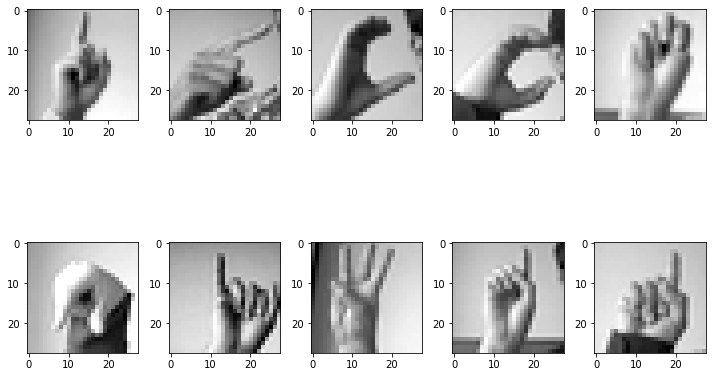

In [27]:
# plotting the firsr 10 images
fig, ax = plt.subplots(2,5)
fig.set_size_inches(10,10)
k=0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [28]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
rescale = 1./ 255
)

In [29]:
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
858/857 [==============================] - 27s 32ms/step - loss: 2.6541 - accuracy: 0.1867 - val_loss: 1.7229 - val_accuracy: 0.4322
Epoch 2/10
858/857 [==============================] - 26s 30ms/step - loss: 1.8763 - accuracy: 0.3967 - val_loss: 1.1669 - val_accuracy: 0.6009
Epoch 3/10
858/857 [==============================] - 25s 29ms/step - loss: 1.4940 - accuracy: 0.5137 - val_loss: 0.9515 - val_accuracy: 0.6525
Epoch 4/10
858/857 [==============================] - 26s 30ms/step - loss: 1.2458 - accuracy: 0.5922 - val_loss: 0.7020 - val_accuracy: 0.7631
Epoch 5/10
858/857 [==============================] - 24s 28ms/step - loss: 1.0600 - accuracy: 0.6483 - val_loss: 0.5129 - val_accuracy: 0.8168
Epoch 6/10
858/857 [==============================] - 24s 28ms/step - loss: 0.9384 - accuracy: 0.6904 - val_loss: 0.4977 - val_accuracy: 0.8147
Epoch 7/10
858/857 [==============================] - 24s 28

[100.48370361328125, 0.7375906109809875]

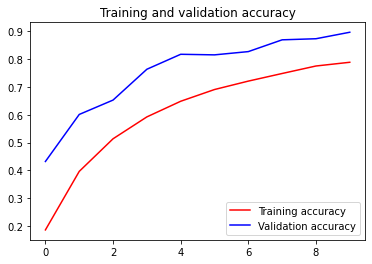

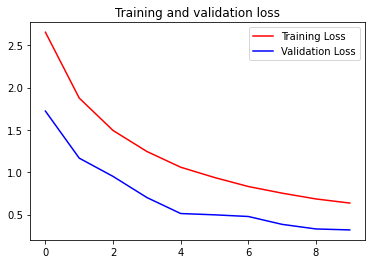

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

C:\Users\srira\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srira\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.78      0.90      0.83       331
     Class 1       1.00      0.73      0.84       432
     Class 2       0.98      0.58      0.73       310
     Class 3       0.43      0.36      0.39       245
     Class 4       0.73      0.98      0.84       498
     Class 5       0.85      0.90      0.88       247
     Class 6       0.75      0.24      0.37       348
     Class 7       0.87      0.74      0.80       436
     Class 8       0.43      1.00      0.60       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.12      0.13      0.12       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.00      0.00      0.00       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0.00       144
    Class 18       0.00    

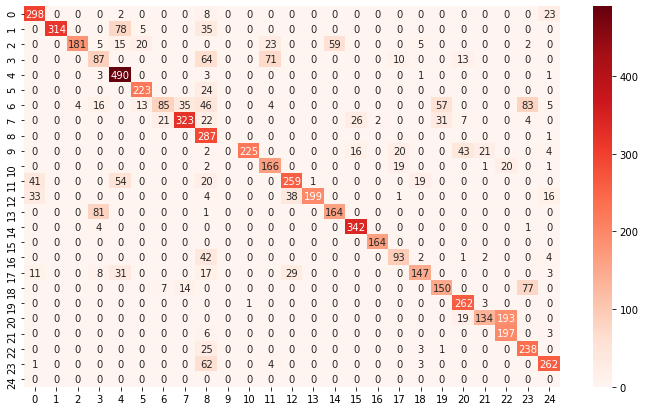

In [34]:
# Predictions 
predictions = model.predict_classes(testing_images)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]   

#Output
#array([ 6,  8, 11, 14, 18])

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))


# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
           fmt='')